<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [575]:
import pandas as pd
import psycopg2

In [576]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python 

In [577]:
connection = psycopg2.connect(
    dbname = 'project_sql',
    user = 'skillfactory',
    password= 'cCkxxLVrDE8EbvjueeMedPKt',
    host = '84.201.134.129',
    port = 5432
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [578]:
# текст запроса
query_3_1 = f'''select 
                  count(*)
               from vacancies
        '''

In [579]:
pd.read_sql_query(query_3_1, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1467523473.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [580]:
query_3_2 = f'''select 
                  count(*)
               from employers
        '''

In [581]:
pd.read_sql_query(query_3_2, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1321910889.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_2, connection)


,count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [582]:
query_3_3 = f'''select 
                  count(*)
               from areas
        '''

In [583]:
pd.read_sql_query(query_3_3, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\169222152.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_3, connection)


,count
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [584]:
query_3_3 = '''select 
                count(*)
               from industries
        '''

In [585]:
pd.read_sql_query(query_3_3, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\169222152.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_3_3, connection)


,count
0,294


Наша база содержит около 50тыс вакансий. На каждого работодателя приходится примерно по 2 вакансии. Довольно обширная география вакансий.

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [586]:
query_4_1 = f'''select 
                    a.name as area,     
                    count(area_id) as cnt
                from vacancies v join areas a
                    on v.area_id = a.id
                group by 1
                order by 2 desc
        '''

In [587]:
pd.read_sql_query(query_4_1, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1702194938.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [588]:
query_4_2 = f'''select  
                    count(id)
                from vacancies 
                where SALARY_FROM  is not null 
                    or SALARY_TO is not null'''

In [589]:
pd.read_sql_query(query_4_2, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\495373726.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_2, connection)


,count
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [590]:
query_4_3 = f'''select 
                    avg(SALARY_FROM)::int, 
                    avg(SALARY_TO)::int
                from vacancies '''

In [591]:
pd.read_sql_query(query_4_3, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2240822411.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_3, connection)


,avg,avg
0,71065,110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [592]:
query_4_4 = f'''select 
                    schedule, 
                    employment, 
                    count(id)
                from vacancies
                group by schedule, employment
                order by 3 desc '''

In [593]:
pd.read_sql_query(query_4_4, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\3130347181.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_4, connection)


,schedule,employment,count
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [594]:
query_4_5 = f'''select 
                    distinct experience, 
                    count(id) over(partition by experience), 
                    (count(id) over(partition by experience)::float/count(id) over())*100 as percent
                from vacancies
                order by 2 '''

In [595]:
pd.read_sql_query(query_4_5, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\3496489661.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_4_5, connection)


,experience,count,percent
0,Более 6 лет,1337,2.717645
1,Нет опыта,7197,14.628941
2,От 3 до 6 лет,14511,29.495701
3,От 1 года до 3 лет,26152,53.157713


Большинство вакансий размещено в крупных городах-миллиониках. Средняя зарплатная вилка в диапазоне от 70 до 110 тыс руб. В половине вакансий зарплатная вилка в принципе не указана. Поиск кандидатов осуществляется преимущетсвенно на полный рабочий день, достаточно большое кол-во вакансий предполагает удаленную работу. Кандидатов в большинстве своем ищут с относительно не большим опытом работы (от года), без опыта работы согласны рассмотреть в 14%



***

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [596]:
query_5_1 = '''select 
                    name, 
                    count
                from
                    (select 
                        e.name as name, 
                        count(v.id) as count, 
                        rank() over(order by count(v.id) desc) as rank -- ранг
                    from vacancies v 
                        join employers e 
                            on v.employer_id=e.id
                    group by 1
                    order by 2 desc) t1 -- вложенный запрос, чтобы забрать все данные из одного запроса
                where  rank=1 or rank=5'''   

In [597]:
pd.read_sql_query(query_5_1, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2735860424.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_1, connection)


,name,count
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [598]:
query_5_2 = '''select 
                    t1.name, 
                    t1.count_empl, 
                    count(v.id) as count_vac
                from
                    (select 
                        a.id id, 
                        a.name as name, 
                        count(e.id) as count_empl
                    from areas a 
                        left join employers e
                            on e.area=a.id
                    group by 1) t1
                    
                    left join vacancies v 
                        on t1.id=v.area_id
                group by 1,2
                    having count(v.id)=0
                order by 2 desc
                limit 1'''

In [599]:
pd.read_sql_query(query_5_2, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1514608624.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_2, connection)


,name,count_empl,count_vac
0,Россия,410,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [600]:
query_5_3 = '''select 
                    e.name, 
                    count(distinct v.area_id)
                from employers e 
                    join vacancies  v
                        on e.id=v.employer_id
                group by 1
                order by 2 desc'''

In [601]:
pd.read_sql_query(query_5_3, connection).head()

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2853237418.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_3, connection).head()


,name,count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [602]:
query_5_4 = '''select  
                    count(e.id)
                from employers e 
                    left join employers_industries ei
                        on e.id=ei.employer_id
                where ei.industry_id is null'''

In [603]:
pd.read_sql_query(query_5_4, connection).head()

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1206186997.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_4, connection).head()


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [604]:
query_5_5 = '''select 
                    e.name, 
                    count(ei.industry_id)
                from employers e 
                    join employers_industries ei
                        on e.id=ei.employer_id
                group by 1
                    having count(ei.industry_id)=4
                order by 1
                offset 2 limit 1'''

In [605]:
pd.read_sql_query(query_5_5, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\3334305160.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_5, connection)


,name,count
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [606]:
query_5_6 = f'''select  
                    count(ei.employer_id)
                from employers_industries ei 
                    join industries i
                        on ei.industry_id=i.id
                where i.name='Разработка программного обеспечения'
'''

In [607]:
pd.read_sql_query(query_5_6, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2432745783.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_6, connection)


,count
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [608]:
#запрос для парсинга данных по городам-миллионникам
import requests
import json
from bs4 import BeautifulSoup
url='https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
city=requests.get(url)
page = BeautifulSoup(city.text, 'html.parser') # Создаём объект BeautifulSoup, указывая html-парсер
table1=page.find('table',class_='standard') 

In [609]:
#преобразование полученных данных в читаемую таблицу
headers = []
for i in table1.find_all('th'):
    title = i.text
    headers.append(title)
    
mydata = pd.DataFrame(columns = headers)
for j in table1.find_all('tr')[1:]:
    row_data = j.find_all('td')
    row = [i.text for i in row_data]
    length = len(mydata)
    mydata.loc[length] = row
    
city=tuple(list(mydata['Город'].replace('Воронеж[a]', 'Воронеж')))

In [610]:
query_5_7 = f'''select 
                    a.name,
                    count(v.id)
                from vacancies v 
                    join areas a
                        on v.area_id=a.id
                    join employers e 
                        on e.id=v.employer_id
                where a.name in {city}
                    and e.name='Яндекс'
                group by 1

                Union

                select 
                    'total',
                    count(v.id)
                from vacancies v 
                    join areas a
                        on v.area_id=a.id
                    join employers e 
                        on e.id=v.employer_id
                where a.name in {city}
                    and e.name='Яндекс'
                order by 2
'''

In [611]:
pd.read_sql_query(query_5_7, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2888435755.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_5_7, connection)


,name,count
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


Лидером среди компаний, размещающих вакансии на сайте hh, является компания "Яндекс". Интересно отметить, что только 25% вакансий данной компании размещено в городах-миллионниках, география поиска сотрудников достаточно широкая в данной компании. В число лидеров компаний, осуществялющих активный поиск сотрудников, являются банки, крупные промышленные компании и организации, предоставляющие телекоммуникационные услуги.

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [612]:
query_6_1 = '''select  
                    count(id)
                from vacancies 
                where lower(name) like '%данн%' 
                    or lower(name) like '%data%'
'''

In [613]:
pd.read_sql_query(query_6_1, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2814080296.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [614]:
query_6_2 = '''select  
                    count(id)
                from vacancies 
                where 
                        (lower(name) like '%data scientist%'
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or name like '%ML%' 
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%') 
                    and 
                        name not like '%HTML%' 
                    and  
                        (lower(name) like '%junior%' 
                        or experience='Нет опыта'
                        or employment='Стажировка')'''

In [615]:
pd.read_sql_query(query_6_2, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\3416457153.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [616]:
query_6_3 = '''select  
                    count(id)
                from vacancies 
                where 
                        (lower(name) like '%data scientist%'
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or name like '%ML%' 
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%') 
                    and 
                        name not like '%HTML%'   
                    and    
                        (lower(key_skills) like '%sql%' 
                        or lower(key_skills) like '%postgres%')'''

In [617]:
pd.read_sql_query(query_6_3, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\133616535.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_3, connection)


,count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [618]:
query_6_4 = '''select  
                    count(id)
                from vacancies 
                where 
                        (lower(name) like '%data scientist%'
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or name like '%ML%' 
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%') 
                    and 
                        name not like '%HTML%'    
                    and 
                        lower(key_skills) like '%python%'
'''

In [619]:
pd.read_sql_query(query_6_4, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2825363179.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_4, connection)


,count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [620]:
#--из первоначальной lлины стр вычитаем длину полученной строки после исключения разделетелей, т.о. получаем кол-во разделителей, добавив 1 получаем итоговое кол-во навыков
query_6_5 = '''select  
                    cast(avg (LENGTH(key_skills) - LENGTH(replace(key_skills, CHR(9), '')) +1 ) as Numeric(6,2)) 
                from vacancies 
                where 
                        (lower(name) like '%data scientist%'
                        or lower(name) like '%data science%'
                        or lower(name) like '%исследователь данных%'
                        or name like '%ML%' 
                        or lower(name) like '%machine learning%'
                        or lower(name) like '%машинн%обучен%') 
                    and 
                        name not like '%HTML%'    
'''



In [621]:
pd.read_sql_query(query_6_5, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1879125076.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_5, connection)


,avg
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [622]:
query_6_6 = '''select 
                    experience, 
                    round(avg(salary))
                from 
                    (select 
                        experience,
                        case --добавляем столбец с расчетом ЗП по условию
                            when 
                                salary_from>0 and SALARY_TO>0
                            then 
                                (salary_from+SALARY_TO)/2
                            when 
                                salary_from>0
                            then 
                                salary_from
                            when 
                                SALARY_TO>0
                            then 
                                SALARY_TO
                            else null
                            end as salary
                        from vacancies 
                        where 
                            (lower(name) like '%data scientist%'
                            or lower(name) like '%data science%'
                            or lower(name) like '%исследователь данных%'
                            or name like '%ML%' 
                            or lower(name) like '%machine learning%'
                            or lower(name) like '%машинн%обучен%') 
                        and 
                            name not like '%HTML%'  ) t1
                group by 1'''

In [623]:
pd.read_sql_query(query_6_6, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\791858229.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_6, connection)


,experience,round
0,Более 6 лет,NaN
1,Нет опыта,74643.0
2,От 1 года до 3 лет,139675.0
3,От 3 до 6 лет,243115.0


Доля вакансий, приходящихся на работу с даннымм, составляет менее 4%(~1.7тыс) от общего числа вакансий(~49тыс). Доля вакансий специалистов по DS составляет порядка 30% (~0.5тыс) от вакансий по работе с данными. Из них только в 10% случаев готовы рассматривать новичков. Ключевыми навыками DS явлюются работа с языком Python(73% вакансий включают данный навык) и знание SQL (42%).
Коэффициент прироста ЗП в зависимости от опыта работы равен примерно 1.8, причем для специалистов с опытом рабоиы от 6 лет уровень ЗП не указан, т.о. можем предположить, что с учетом имеющегося тренда уровень ЗП в данной категории от 350тыс и более.

***

In [624]:
pd.read_sql_query(query_6_1, connection)/pd.read_sql_query(query_3_1, connection) #расчет доли вакансий, связанных с работой с данными, от общего числа

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\645166433.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_1, connection)/pd.read_sql_query(query_3_1, connection) #расчет доли вакансий, связанных с работой с данными, от общего числа
C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\645166433.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_6_1, connection)/pd.read_sql_query(query_3_1, connection) #расчет доли вакансий, связанных с работой с данными, от общего числа


,count
0,0.035998


In [625]:
query_ds = '''select  
                count(id)
            from vacancies 
            where 
                (lower(name) like '%data scientist%'
                or lower(name) like '%data science%'
                or lower(name) like '%исследователь данных%'
                or name like '%ML%' 
                or lower(name) like '%machine learning%'
                or lower(name) like '%машинн%обучен%') 
            and 
                name not like '%HTML%'  
'''
# кол-во вакансий DS

In [626]:
pd.read_sql_query(query_ds, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\452487550.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_ds, connection)


,count
0,480


In [627]:
#расчет коэффициента прироста ЗП в зависимости от опыта работы
query_koef = '''select  
                    experience, 
                    avg/lag(avg, 1) over() as koef
                from
                    (select     
                        experience, 
                        round(avg(salary)) as avg
                        from 
                            (select 
                                experience,
                                case
                                    when 
                                        salary_from>0 and SALARY_TO>0
                                    then 
                                        (salary_from+SALARY_TO)/2
                                    when 
                                        salary_from>0
                                    then 
                                        salary_from
                                    when 
                                        SALARY_TO>0
                                    then 
                                        SALARY_TO
                                    else null
                                    end as salary
                            from vacancies 
                            where 
                                    (lower(name) like '%data scientist%'
                                    or lower(name) like '%data science%'
                                    or lower(name) like '%исследователь данных%'
                                    or name like '%ML%' 
                                    or lower(name) like '%machine learning%'
                                    or lower(name) like '%машинн%обучен%') 
                                and    
                                    name not like '%HTML%' ) t1
                            group by 1)t2'''

In [628]:
pd.read_sql_query(query_koef, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\138063606.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_koef, connection)


,experience,koef
0,Более 6 лет,NaN
1,Нет опыта,NaN
2,От 1 года до 3 лет,1.871240
3,От 3 до 6 лет,1.740576


# Общий вывод по проекту

In [629]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

Посмотрим на средние ЗП  в территориальном разрезе

In [630]:
query_city_salary = '''select  
                            area, 
                            round(avg(salary))
                         from
                            (select 
                                a.name as area,
                                case 
                                    when 
                                        salary_from>0 and SALARY_TO>0
                                    then 
                                        (salary_from+SALARY_TO)/2
                                    when 
                                        salary_from>0
                                    then 
                                        salary_from
                                    when 
                                        SALARY_TO>0
                                    then 
                                        SALARY_TO
                                    else null
                                    end as salary
                            from vacancies v 
                                join areas a 
                                    on a.id=v.area_id
                            where 
                                    (lower(v.name) like '%data scientist%'
                                    or lower(v.name) like '%data science%'
                                    or lower(v.name) like '%исследователь данных%'
                                    or v.name like '%ML%' 
                                    or lower(v.name) like '%machine learning%'
                                    or lower(v.name) like '%машинн%обучен%') 
                                and 
                                    v.name not like '%HTML%')t1
                        where salary is not null
                        group by 1
                        order by 2 desc
                '''

In [631]:
pd.read_sql_query(query_city_salary, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\2522678430.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query(query_city_salary, connection)


,area,round
0,Кипр,300000.0
1,Армения,268863.0
2,Черногория,233794.0
3,Турция,233794.0
4,Сербия,233794.0
5,Москва,207630.0
6,Белгород,200000.0
7,Санкт-Петербург,173335.0
8,Новосибирск,166333.0
9,Рязань,136667.0


Уровень ЗП при работе за переделами РФ значительно выше, чем в регоних РФ.
Крупные города-миллионники также предлагают достойный уровень ЗП, в регионах же ЗП значительно ниже

In [632]:
query_vacancies= '''select 
                        a.name as area,
                        e.name as employment,
                        KEY_SKILLS, 
                        schedule,
                        experience,
                        EMPLOYMENT,
                        сase 
                            when 
                                salary_from>0 and SALARY_TO>0
                            then 
                                (salary_from+SALARY_TO)/2
                            when 
                                salary_from>0
                            then 
                                salary_from
                            when 
                                SALARY_TO>0
                            then 
                                SALARY_TO
                            else null
                            end as salary
                    from vacancies v join
                    areas a on a.id=v.area_id
                    join employers e on e.id=v.employer_id
                    where 
                            (lower(v.name) like '%data scientist%'
                            or lower(v.name) like '%data science%'
                            or lower(v.name) like '%исследователь данных%'
                            or v.name like '%ML%' 
                            or lower(v.name) like '%machine learning%'
                            or lower(v.name) like '%машинн%обучен%') 
                        and 
                            v.name not like '%HTML%'
'''

In [633]:
df=pd.read_sql_query(query_vacancies, connection)

C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1987411818.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql_query(query_vacancies, connection)


<AxesSubplot: title={'center': 'Топ-10 городов по кол-ву вакансий DS'}>

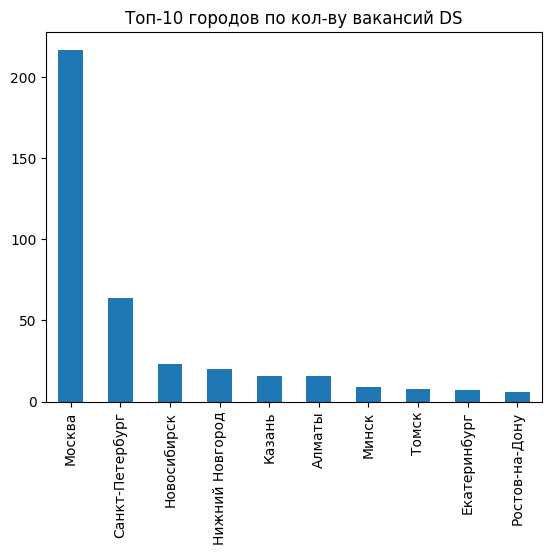

In [634]:
df['area'].value_counts().head(10).plot(kind='bar', title='Топ-10 городов по кол-ву вакансий DS')

In [635]:
df['area'].value_counts(normalize=True).head()

Москва             0.452083
Санкт-Петербург    0.133333
Новосибирск        0.047917
Нижний Новгород    0.041667
Казань             0.033333
Name: area, dtype: float64

Больше половины вакансиий размещено в Москве и Санкт-Петербурге, причем доля вакансий в Москве стремится к 50%.

Посмотрим какие навыки преимщественно просят работдатели:

In [636]:
import numpy as np
from collections import Counter
df['skills']=df['key_skills'].apply(lambda x:  []  if x is None else x.split('\t')) 
list_skills=list(df['skills'])
list_skills=sum(list_skills, [])
c=Counter()
for skill in list_skills:
    c[skill]+=1
c.most_common()[:10]

[('Python', 348),
 ('SQL', 191),
 ('Machine Learning', 114),
 ('Git', 66),
 ('Математическая статистика', 62),
 ('Data Analysis', 54),
 ('Data Science', 52),
 ('Pandas', 52),
 ('ML', 49),
 ('Английский язык', 48)]

Выделим перечень навыков: Python, SQL, Математическая статистика, Git, Английский язык, Machine Learning/ML.
Проставим признак упоминания в вакансии данных навыков

In [638]:
list_skills=['Python', 'SQL', 'Математическая статистика', 'Git', 'Английский язык', 'Machine Learning', 'ML']
for skill in list_skills:
    df[skill]=df['skills'].apply(lambda x: 1 if skill in x else 0)

df['ML_']=df.apply(lambda x: max(x['Machine Learning'],x['ML'] ), axis=1)
df=df.drop(columns=['Machine Learning', 'ML','skills','key_skills'])
df.head()

,area,employment,schedule,experience,employment,salary,Python,SQL,Математическая статистика,Git,Английский язык,ML_
0,Новосибирск,Технологика,Гибкий график,От 1 года до 3 лет,Полная занятость,NaN,1,1,0,0,0,1
1,Алматы,Мобайл Телеком-Сервис (Объединенная Компания T...,Полный день,От 1 года до 3 лет,Полная занятость,NaN,1,0,0,1,0,1
2,Пермь,Випакс+,Полный день,От 1 года до 3 лет,Полная занятость,60000.0,1,0,0,0,0,0
3,Ташкент,Itransition,Гибкий график,От 3 до 6 лет,Полная занятость,NaN,1,0,0,1,0,0
4,Краснодар,МегаФон,Полный день,От 1 года до 3 лет,Полная занятость,NaN,1,1,0,0,0,1


C:\Users\Vint\AppData\Local\Temp\ipykernel_10456\1462245416.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()).set_title('Корреляция навыков с ЗП');


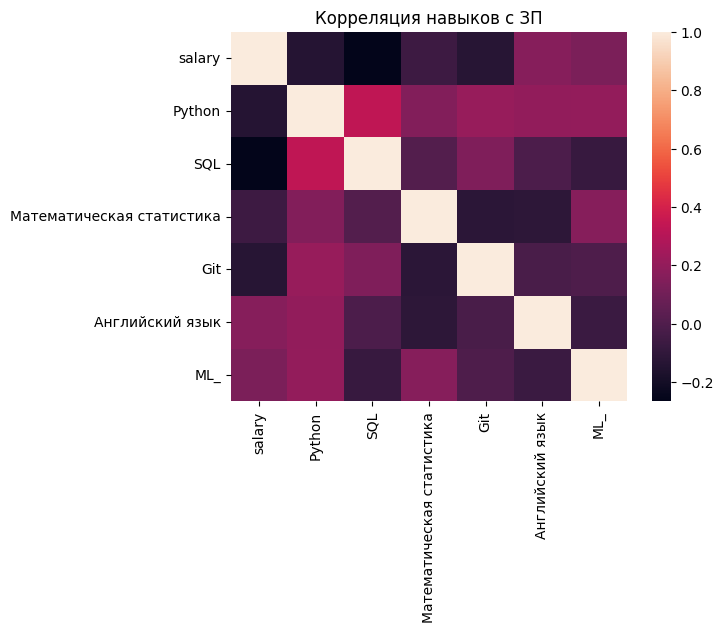

In [646]:
import seaborn as sns
sns.heatmap(df.corr()).set_title('Корреляция навыков с ЗП');

Из данной матрицы корреляции можно сделать следющее предположение:  знание Python и SQL является навыком "по умолчанию", а вот за навыки в виде англ. языка и ML работодатель готов платить больше

Подведем итоги: 
- спрос на специалистов по DS преобладает в крупных городах, наибольший % предложений размещено в Москве
- работодатели, предлагающие работу за пределами РФ, готовы предлагать ЗП выше
- основные навыки, которые работодатель требует от соискателей: python, SQL, мат статистика, ML
- При поиске кандидатов со знанием английского языка - работодатель готов предложить больший уровень ЗП
- Нижняя граница по ЗП для начинающих специалистов в арйоне 75тыс руб, ЗП для кандидатов с опытом от 6 лет не указана ни в одной из вакансий
- При прогнозе ЗП необходимо учитывать опыт работы, который требуется от кандидата, географию и ключевые навыки